# Exercise 10

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import pickle


## 1. Hurricanes per Year

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [3]:
#Find Z-value
mu = 6.3 #Expected value
x = 15 
sigma = np.sqrt(mu) #standard diviation

Z = (x - mu) / sigma
print('The Z-value is: ', Z)



The Z-value is:  3.4661629670697414


As the Z value is larger than 3, it is statistically significant.

## 2. Pairwise t-test

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [8]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_sigma = np.sqrt(np.var(pre, ddof=1))
post_sigma = np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((pre_sigma**2 + post_sigma**2)/2)


pre_mean = np.mean(pre)
post_mean = np.mean(post)

n = len(pre)

T = (pre_mean - post_mean) / (sigma * np.sqrt(2 / n))
print(T)


#Calculate the p-value as done in class:
p_value = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", p_value)

-3.786997938137629
p-value = 0.004302464132864604


As the p-value is very small (≈ 0.4 %) we conclude that the change in blood preassure was not statistically significant.

## 3. Curve fitting of temperature in Alaska

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

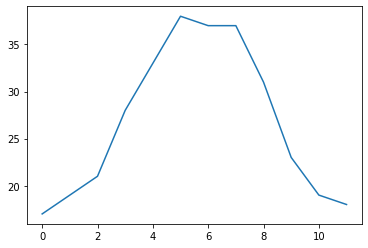

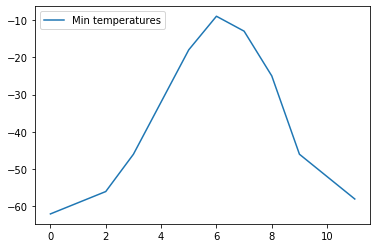

In [7]:
max_temp = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

plt.plot(max_temp, label = 'Max temperatures')
plt.show()
plt.plot(min_temp, label = 'Min temperatures')
plt.legend()
plt.show()

I try fitting with a secend degree polynomial:

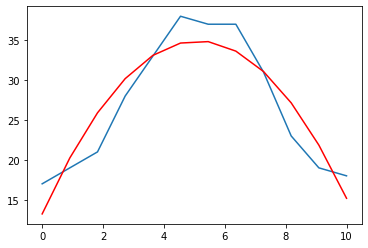

In [50]:
def f_poly(x, A, B, C):
    return A*x**2 + B*x + C

x = np.linspace(0,10,12)
popt, pcov = curve_fit(f_poly, x, max_temp)
plt.plot(x, max_temp)
plt.plot(x, f_poly(x, *popt), 'r-')

This is clearly not a good fit, so we try a sine-function instead.

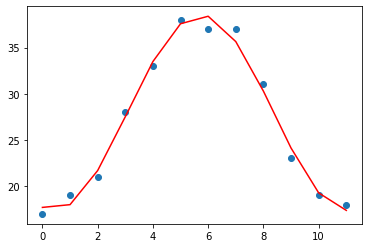

In [52]:
def f_sin(x, A, w, phi, C):
    return A*np.sin(w*x + phi) + C

x = np.arange(0,12)
popt_max, pcov_max = curve_fit(f_sin, x, max_temp)
plt.scatter(x, max_temp)
plt.plot(x, f_sin(x, *popt_max), 'r-')


[ 25.14962115   0.60132062   4.16608461 -36.7125749 ]


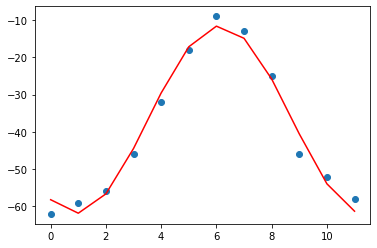

In [48]:
popt_min, pcov_min = curve_fit(f_sin, x, min_temp, p0 = [20,np.pi/3,np.pi/3,-50])
#print(popt_min)
plt.scatter(x, min_temp)
plt.plot(x, f_sin(x, *popt_min), 'r-')

This seems to be quite a good fit.

Time offset??????

## 4. Fit the residues

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


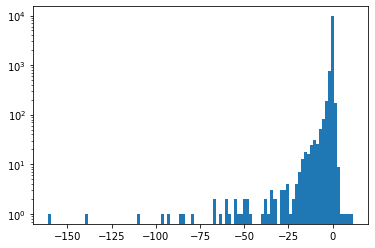

In [41]:
#using Pickle to read the pkl file
infile = open('Data/residuals_261.pkl', 'rb')
new_dict = pickle.load(infile)
infile.close()

#Get only the residual features
res = new_dict.item()['residuals']
#print(new_dict)
#counts, bins = np.histogram(res)
plt.hist(res, 100)
plt.yscale('log')
plt.show()

[-0.28035894  5.09458961 -0.61609824]


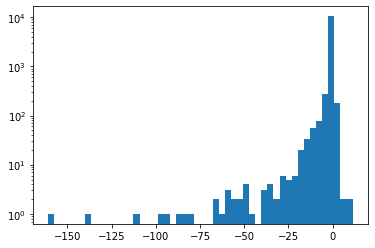

In [45]:
def exp(x,a,b,c):
    return a*np.exp(b*x) + c

x = np.linspace(-150,0, len(res))

popt_exp, pcov_exp = curve_fit(exp, x, res)
print(popt_exp)
#plt.scatter(res)
plt.plot(x, exp(x, *popt_exp), 'r-')
plt.hist(res, 50)
plt.yscale('log')
#plt.plot(x, exp(x, *popt_exp), 'r-')


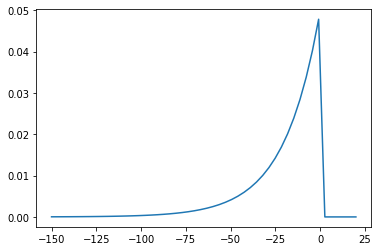

In [206]:
def flap(x,k):
    new = []
    for i in x:
        if i >= 0:
            new.append(((1/(k + k**(-1)))* np.exp(-i*k)))
        else:
            new.append(((1/(k + k**(-1)))* np.exp(i/k)))
    return new
x = np.linspace(-150, 20)   
f = flap(x, 20)
plt.plot(x, f)
#plt.yscale('log')
#plt.xlim(-150,20)
#plt.hist(res, 50)
#plt.yscale('log')
#plt.show()

I would expect the function to be aither an exponential or a asymmetrical laplacian distribution, however I am not able to do a curve fit.


## 5. Temperatures in Munich

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

The best-fit values of the parameters are: a = -10.093509486164788, b = 18.591251837020998, c = 9.261525270793287
The average temperature is: c = 9.261525270793287
The typical daily average temperature for the coldest time of the year is: c + a = -0.8319842153715005
The typical daily average temperature for the hottest time of the year is: c - a = 19.355034756958077
The b parameter is the phase-parameter of the function


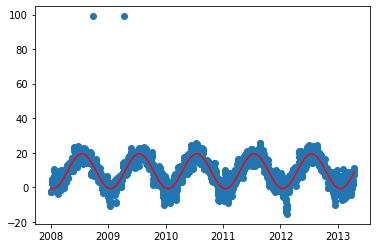

In [249]:
def f_func(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

df = pd.read_csv('Data/munich_temperatures_average_with_bad_data.txt', sep = ' ' ,header = 0,names= ['y', 't'])
df
years1 = np.array(df['y'])
temps1 = np.array(df['t'])

years = years1[years1 > 2008]
temps = temps1[years1 > 2008]

popt_temp, pcov_temp = curve_fit(f_func, years, temps)
#print(pcov_temp)
plt.scatter(years, temps)
plt.plot(years, f_func(years, *popt_temp), 'r-')

print(f'The best-fit values of the parameters are: a = {popt_temp[0]}, b = {popt_temp[1]}, c = {popt_temp[2]}')
print(f'The average temperature is: c = {popt_temp[2]}')
print(f'The typical daily average temperature for the coldest time of the year is: c + a = {popt_temp[2] + popt_temp[0]}')
print(f'The typical daily average temperature for the hottest time of the year is: c - a = {popt_temp[2] - popt_temp[0]}')
print('The b parameter is the phase-parameter of the function')

The best-fit values of the parameters are: a = -10.097593899029796, b = 0.9962944199566484, c = 65.40601592437446, d = 9.243246283124146


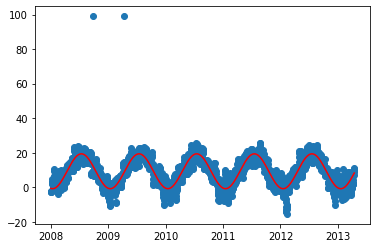

In [252]:
def g_func(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t + c) + d

popt_gtemp, pcov_gtemp = curve_fit(g_func, years, temps)

plt.scatter(years, temps)
plt.plot(years, g_func(years, *popt_gtemp), 'r-')

print(f'The best-fit values of the parameters are: a = {popt_gtemp[0]}, b = {popt_gtemp[1]}, c = {popt_gtemp[2]}, d = {popt_gtemp[3]}')

In [258]:
res_f = temps - f_func(years, *popt_temp)
ssr_1 = np.sum(res_f**2)
n_1 = 3
print(f'The RSS of f(x) is: {ssr_1}')

res_g = temps - g_func(years, *popt_gtemp)
ssr_2 = np.sum(res_g**2)
n_2 = 4
print(f'The RSS of g(x) is: {ssr_2}')


The RSS of f(x) is: 42527.75965166897
The RSS of g(x) is: 42410.17254144347


In [260]:
alpha = 0.05 # note that alpha could also be 0.10

# uses the Ftest that is presented in class
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

N = n_1 + n_2

Ftest(ssr_1, ssr_2, n_1, n_2, N, verbose = True)

p-value: 0.933 , additional parameter necessary: NO


0.9330803806480871

There is no need for another parameter